In [9]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    r'D:\thesis\train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    r'D:\thesis\validate',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    r'D:\thesis\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 4277 images belonging to 334 classes.
Found 992 images belonging to 334 classes.
Found 1017 images belonging to 334 classes.


In [11]:
base_model = VGG19(weights='imagenet', include_top=False,
                   input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=50,  # Consider increasing epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size)

Epoch 1/50
133/133 [==============================] - 55s 411ms/step - loss: 5.8071 - accuracy: 0.0122 - val_loss: 5.5733 - val_accuracy: 0.0272
Epoch 2/50
133/133 [==============================] - 52s 393ms/step - loss: 5.2185 - accuracy: 0.0848 - val_loss: 5.0930 - val_accuracy: 0.1018
Epoch 3/50
133/133 [==============================] - 54s 407ms/step - loss: 4.4789 - accuracy: 0.2330 - val_loss: 4.5348 - val_accuracy: 0.2046
Epoch 4/50
133/133 [==============================] - 54s 405ms/step - loss: 3.7532 - accuracy: 0.3887 - val_loss: 4.0671 - val_accuracy: 0.2500
Epoch 5/50
133/133 [==============================] - 54s 403ms/step - loss: 3.1289 - accuracy: 0.5267 - val_loss: 3.6790 - val_accuracy: 0.3347
Epoch 6/50
133/133 [==============================] - 54s 403ms/step - loss: 2.5956 - accuracy: 0.6214 - val_loss: 3.3395 - val_accuracy: 0.4093
Epoch 7/50
133/133 [==============================] - 55s 410ms/step - loss: 2.1491 - accuracy: 0.7326 - val_loss: 3.0154 - val_ac

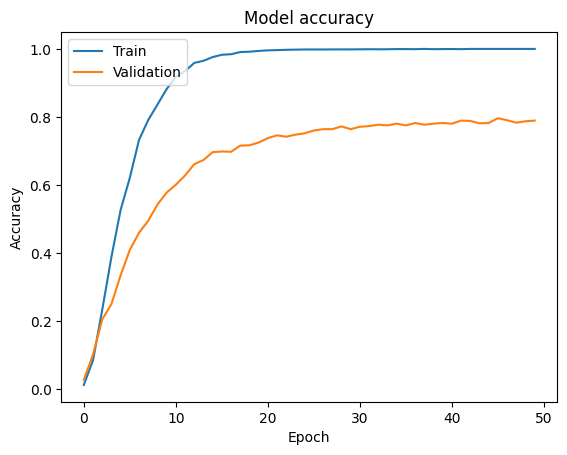

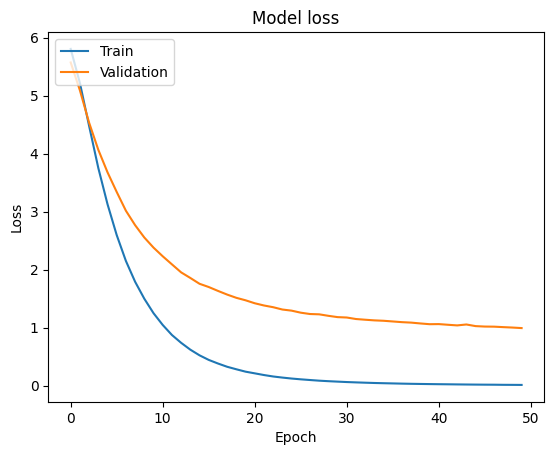

32/32 [==============================] - 19s 600ms/step - loss: 0.8386 - accuracy: 0.8161
Test accuracy: 0.8161258697509766, Test loss: 0.8386198878288269


In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")

In [15]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

31/31 [==============================] - 11s 337ms/step - loss: 0.9913 - accuracy: 0.7893
Validation Accuracy: 78.93%


In [17]:
pip install scikit-learn


   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.0/9.3 MB 495.5 kB/s eta 0:00:19
   ---------------------------------------- 0.1/9.3 MB 1.1 MB/s eta 0:00:09
   - -------------------------------------- 0.2/9.3 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.3 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.3/9.3 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.3 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.3 MB 1.3 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.3 MB 933.2 kB/s eta 0:00:10
   - -------------------------------------- 0.4/9.3 MB 937.3 kB/s eta 0:00:10
   - -------------------------------------- 0.5/9.3 MB 940.9 kB/s eta 0:00:10
   - -------------------------------------- 0.5/9.3 MB 940.9 kB/s eta 0:00:10
   - ----

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Generate predictions
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

31/31 [==============================] - 11s 343ms/step


In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Plotting the confusion matrix
plot_confusion_matrix(cm, classes=validation_generator.class_indices.keys())
plt.show()

NameError: name 'plt' is not defined

In [21]:
pip install seaborn

   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.8 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.8 kB 435.7 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.8 kB 393.8 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.8 kB 393.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.8 kB 280.5 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.8 kB 280.5 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.8 kB 275.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.8 kB 275.8 kB/s eta 0:00:01
   ----------

In [23]:
from sklearn.metrics import precision_recall_fscore_support